In [50]:
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [51]:
Tr = 10
d = 1
a1_min, a1_max = 21.19, 32.02
n_min, n_max = 0.2987, 0.4431
alpha_min, alpha_max = 0.2929, 0.3389
epsilon_min, epsilon_max = 0.7595, 0.8293
kappa_min, kappa_max = -0.132, 0.0126

In [72]:
model_evaluations = 100000000

In [73]:
a1 = np.random.uniform(a1_min, a1_max, model_evaluations)
n = np.random.uniform(n_min, n_max, model_evaluations)
alpha = np.random.uniform(alpha_min, alpha_max, model_evaluations)
epsilon = np.random.uniform(epsilon_min, epsilon_max, model_evaluations)
kappa = np.random.uniform(kappa_min, kappa_max, model_evaluations)

In [74]:
wtr = epsilon + alpha / kappa * (1 - (np.log(Tr / (Tr - 1))) ** kappa)
atr = a1 * wtr
h = atr * d ** n

In [75]:
nclass = 50

In [76]:
print('Mean ', np.mean(h))
print('Var ', np.var(h))
print('Skew ', skew(h))
print('Kurt ', 3 + kurtosis(h))

cond_mean=np.zeros((5,nclass))
cond_var=np.zeros((5,nclass))
cond_skew=np.zeros((5,nclass))
cond_kurt=np.zeros((5,nclass))

AMAE=np.zeros(5)
AMAV=np.zeros(5)
Si=np.zeros(5)
AMAskew=np.zeros(5)
AMAkurt=np.zeros(5)

Output = np.zeros((model_evaluations,2))
Sampling_Points = np.stack((a1,n,alpha,epsilon,kappa),axis=1)

Mean  41.408517863338076
Var  25.667744580477553
Skew  0.053946710520028245
Kurt  1.9844483451577795


In [77]:
for par in range(5):
    Output[:,0] = Sampling_Points[:,par]
    Output[:,1] = h
    par_min = Sampling_Points[:,par].min()
    par_max = Sampling_Points[:,par].max()
    dpar = (par_max-par_min)/nclass

    for iclass in range (0,nclass):
        output_class = (Output[(Output[:,0]<par_min+dpar*(iclass+1)) & (Output[:,0]>par_min+dpar*iclass)])[:,1]
        cond_mean[par,iclass]=np.mean(output_class)
        cond_var[par,iclass]=np.var(output_class)
        cond_skew[par,iclass]=skew(np.reshape(output_class,-1))
        cond_kurt[par,iclass]=3+kurtosis(np.reshape(output_class,-1))

    Si[par]=(np.var(cond_mean[par,:],ddof=1))/np.var(Output[:,1])
    AMAE[par]=np.mean(abs(cond_mean[par,:]-np.mean(Output[:,1])))/abs(np.mean(Output[:,1]))
    AMAV[par]=np.mean(abs(cond_var[par,:]-np.var(Output[:,1])))/abs(np.var(Output[:,1]))
    AMAskew[par]=np.mean(abs(cond_skew[par,:]-skew(np.reshape(Output[:,1],-1))))/abs(skew(np.reshape(Output[:,1],-1)))
    AMAkurt[par]=np.mean(abs(cond_kurt[par,:]-(3+kurtosis(np.reshape(Output[:,1],-1)))))/abs((3+kurtosis(np.reshape(Output[:,1],-1))))

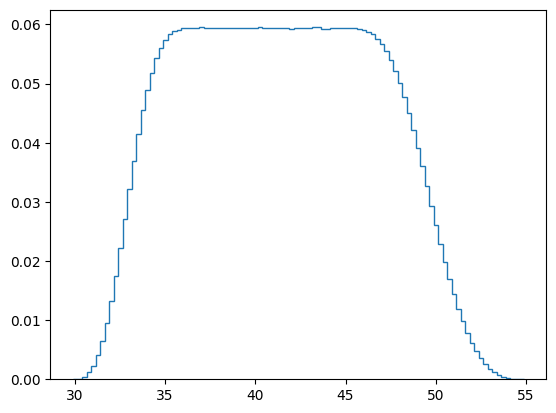

In [83]:
plt.hist(atr, bins=100, histtype='step', density=True, label='Histogram')
plt.show()

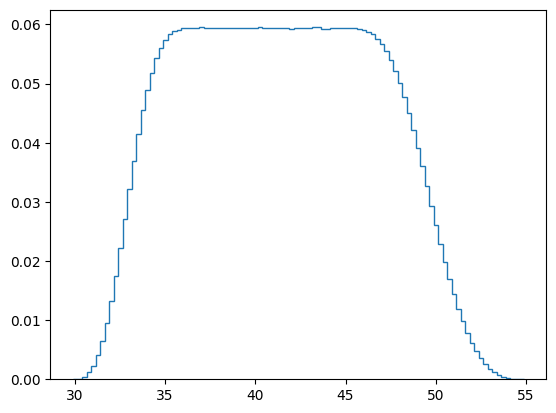

In [80]:
plt.hist(h, bins=100, histtype='step', density=True, label='Histogram')
plt.show()

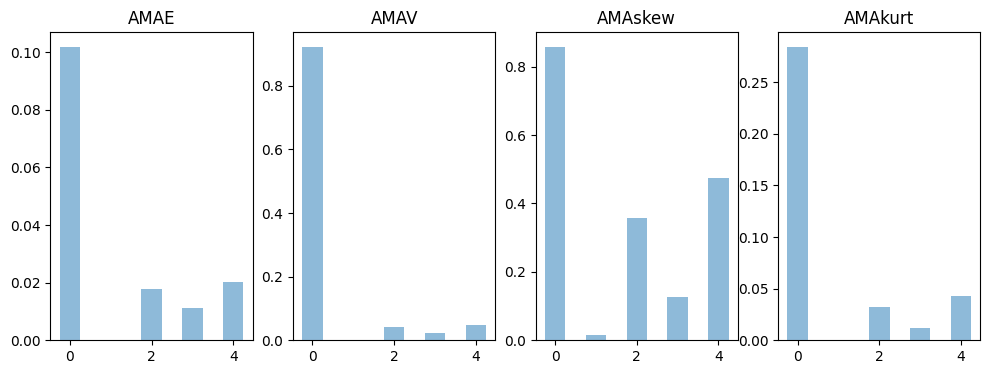

In [81]:
fig, ax = plt.subplots(1, 4, figsize=(12,4))

ax[0].bar(np.arange(5), AMAE, width=0.5, align='center', alpha=0.5)
ax[0].set_title('AMAE')

ax[1].bar(np.arange(5), AMAV, width=0.5, align='center', alpha=0.5)
ax[1].set_title('AMAV')

ax[2].bar(np.arange(5), AMAskew, width=0.5, align='center', alpha=0.5)
ax[2].set_title('AMAskew')

ax[3].bar(np.arange(5), AMAkurt, width=0.5, align='center', alpha=0.5)
ax[3].set_title('AMAkurt')

plt.show()

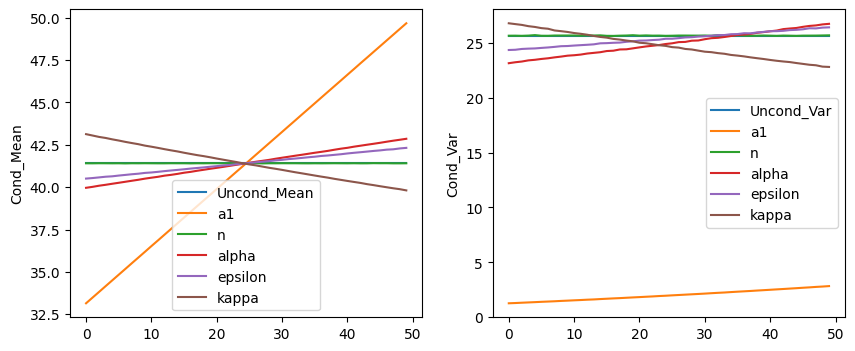

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].set_ylabel('Cond_Mean')
ax[0].plot(np.mean(h)*np.ones(nclass), label = 'Uncond_Mean')
ax[0].plot(cond_mean[0,:], label = 'a1')
ax[0].plot(cond_mean[1,:], label = 'n')
ax[0].plot(cond_mean[2,:], label = 'alpha')
ax[0].plot(cond_mean[3,:], label = 'epsilon')
ax[0].plot(cond_mean[4,:], label = 'kappa')
ax[0].legend()

ax[1].set_ylabel('Cond_Var')
ax[1].plot(np.var(h)*np.ones(nclass), label = 'Uncond_Var')
ax[1].plot(cond_var[0,:], label = 'a1')
ax[1].plot(cond_var[1,:], label = 'n')
ax[1].plot(cond_var[2,:], label = 'alpha')
ax[1].plot(cond_var[3,:], label = 'epsilon')
ax[1].plot(cond_var[4,:], label = 'kappa')
ax[1].legend()

# ax[1,0].set_ylabel('Cond_Skew')
# ax[1,0].plot(skew(h)*np.ones(nclass), label = 'Uncond_Skew')
# ax[1,0].plot(cond_skew[0,:], label = 'a1')
# ax[1,0].plot(cond_skew[1,:], label = 'n')
# ax[1,0].plot(cond_skew[2,:], label = 'alpha')
# ax[1,0].plot(cond_skew[3,:], label = 'epsilon')
# ax[1,0].plot(cond_skew[4,:], label = 'kappa')
# ax[1,0].legend()

# ax[1,1].set_ylabel('Cond_Kurt')
# ax[1,1].plot((3+kurtosis(h))*np.ones(nclass), label = 'Uncond_Kurt')
# ax[1,1].plot(cond_kurt[0,:], label = 'a1')
# ax[1,1].plot(cond_kurt[1,:], label = 'n')
# ax[1,1].plot(cond_kurt[2,:], label = 'alpha')
# ax[1,1].plot(cond_kurt[3,:], label = 'epsilon')
# ax[1,1].plot(cond_kurt[4,:], label = 'kappa')
# ax[1,1].legend()
